In [3]:
gloveFile = "glove.6B.50d.txt"
import numpy as np
import re
from nltk.corpus import stopwords
import pandas as pd
import PyPDF2
import scipy as sp
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams
from collections import Counter
import re
import math
import nltk
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import seaborn as sns
import matplotlib.pyplot as plt


Glove Model are **pre-trained vectors** that are useful in finding Synonyms of words

In [4]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

The preprocces function removes the **special charaters** converts letters to **lower case** and **removes stop words**

In [5]:

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    stopword_set.add('sauni')
    stopword_set.add('far')
    stopword_set.add('yet')
    stopword_set.add('live')
    stopword_set.add('knew')
    stopword_set.add('use')
    stopword_set.add('run')
    stopword_set.add('looking')
    stopword_set.add('life')
    stopword_set.add('away')
    stopword_set.add('n')
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

In [6]:

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

In [7]:

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1


In [8]:
def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance assess that our two sentences are similar to',round((1-cosine)*100,2),'%')



Reading the summary of the books

We are checking the similarity between 2 books of same Author, the books we used to check the similarity are 

**Dan Brown's "Da Vinci Code" and "The Last Symbol"**

In [9]:
da_vinci_code =  open("da vinci code prologue.txt", encoding='utf-8').read()

In [30]:
great_gatsby= open("The_Great_Gatsby_Summary.txt", encoding='utf-8').read()

In [31]:
da_vinci_code

'Renowned curator Jacques Saunière staggered through the vaulted archway of the museum\'s Grand Gallery. He lunged for the nearest painting he could see, a Caravaggio. Grabbing the gilded frame, the seventy-six-year-old man heaved the masterpiece toward himself until it tore from the wall and Saunière collapsed backward in a heap beneath the canvas.\nAs he had anticipated, a thundering iron gate fell nearby, barricading the entrance to the suite. The parquet floor shook. Far off, an alarm began to ring.\nThe curator lay a moment, gasping for breath, taking stock. I am still alive. He crawled out from under the canvas and scanned the cavernous space for someplace to hide.\nA voice spoke, chillingly close. "Do not move."\nOn his hands and knees, the curator froze, turning his head slowly.\nOnly fifteen feet away, outside the sealed gate, the mountainous silhouette of his attacker stared through the iron bars. He was broad and tall, with ghost-pale skin and thinning white hair. His\nirise

In [32]:
lost_symbol = open("Lost Symbol.txt", encoding='utf-8').read()

In [33]:
lost_symbol

"Since the beginning of time, the secret had always been how to die.\nThe thirty-four-year-old initiate gazed down at the human skull cradled in his palms. The\nskull was hollow, like a bowl, filled with blood red wine.\nDrink it, he told himself. You have nothing to fear.\nAs was tradition, he had begun this journey adorned in the ritualistic garb of a medieval\nheretic being led to the gallows, his loose-fitting shirt gaping open to reveal his pale\nchest, his left pant leg rolled up to the knee, and his right sleeve rolled up to the elbow.\nAround his neck hung a heavy rope noose—a “cable-tow” as the brethren called it.\nTonight, however, like the brethren bearing witness, he was dressed as a master.\nThe assembly of brothers encircling him all were adorned in their full regalia of lambskin\naprons, sashes, and white gloves. Around their necks hung ceremonial jewels that\nglistened like ghostly eyes in the muted light. Many of these men held powerful stations\nin life, and yet the i

Loading the pre-trained vector

In [14]:
model = loadGloveModel(gloveFile)


Loading Glove Model
Done. 400000  words loaded!


Preprocessing the data from the books:- Taking only words,convering to lower case and removing stop words

In [34]:
da_vinci_code_processed=preprocess(da_vinci_code)

In [35]:
da_vinci_code_processed

['identity',
 'hair',
 'shirt',
 'struggling',
 'adrenaline',
 'every',
 'huge',
 'mountainous',
 'famous',
 'wincing',
 'murdered',
 'next',
 'began',
 'accent',
 'recoiled',
 'assailant',
 'saw',
 'friends',
 'dark',
 'thundering',
 'thought',
 'least',
 'bars',
 'froze',
 'lodged',
 'missed',
 'require',
 'collection',
 'bullet',
 'linen',
 'despite',
 'horror',
 'ghostly',
 'faculties',
 'opulent',
 'many',
 'lie',
 'know',
 'chest',
 'lost',
 'way',
 'earth',
 'calmly',
 'almost',
 'taking',
 'blood',
 'nearest',
 'tilted',
 'regret',
 'procedure',
 'move',
 'rightful',
 'corridor',
 'circle',
 'existed',
 'chain',
 'walls',
 'breathe',
 'pale',
 'rolled',
 'breastbone',
 'entrusted',
 'dead',
 'protected',
 'heat',
 'turning',
 'remaining',
 'defenseless',
 'would',
 'roared',
 'gaze',
 'minutes',
 'gripped',
 'smirking',
 'anticipated',
 'horribly',
 'canvas',
 'felt',
 'pistol',
 'time',
 'survive',
 'space',
 'scanned',
 'following',
 'immobile',
 'fail',
 'suite',
 'leveled',

In [36]:
lost_symbol_processed=preprocess(lost_symbol)

Using the cosine distance similarity check method to find the similarity in Da Vinci code and The Lost Symbol

In [37]:
result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in lost_symbol_processed] for word1 in da_vinci_code_processed]

In [38]:
result_list

[[0.3287515119489781,
  0.26495637251584947,
  0.23852610886859416,
  0.10638383714611421,
  0.02999583676540396,
  0.4729208288743454,
  0.15630502991864093,
  0.34509425348484135,
  0.3495907201086168,
  0.40004305520695516,
  0.33198215837315226,
  0.2724807543674743,
  0.14421233610330197,
  0.38804509968809864,
  0.35536851681381143,
  0.43093102832506613,
  -0.04222093077986333,
  0.048187595333430866,
  0.4868071575463162,
  0.1754496223078208,
  0.1064781840737411,
  -0.24515723473220108,
  0.1994264193612285,
  0.5734941978013769,
  0.5361557818107265,
  0.20136592745348025,
  0.2587230969913046,
  0.5132122805919747,
  0.4741911556635099,
  0.19581500171509325,
  0.33101197470391197,
  0.44822119099193536,
  0.06726418469785256,
  0.4411692074461955,
  0.0611356715470639,
  0.37023554899231526,
  0.39538773468378086,
  -0.08268654015331034,
  0.2873465054091269,
  -0.0023981494627003386,
  0.19687914021975228,
  0.2062126002013812,
  0.34697760247700526,
  0.14406496921066103

In [39]:
result_df = pd.DataFrame(result_list)
result_df.columns = lost_symbol_processed
result_df.index = da_vinci_code_processed

In [40]:
result_df

hair     shirt     quiet  imparted  encircled     every  \
identity    0.328752  0.264956  0.238526  0.106384   0.029996  0.472921   
hair        1.000000  0.705365  0.372949  0.166039   0.135400  0.447105   
shirt       0.705365  1.000000  0.345240 -0.131690   0.298380  0.423055   
struggling  0.231136  0.213592  0.436359 -0.058777   0.062035  0.428835   
adrenaline  0.372054  0.095562  0.271169  0.329378  -0.056996  0.327037   
...              ...       ...       ...       ...        ...       ...   
instant     0.277227  0.256963  0.333396  0.249878  -0.240486  0.516051   
found       0.540148  0.325740  0.405858 -0.030159   0.223632  0.642512   
true        0.429430  0.304945  0.549122  0.159494  -0.015843  0.726875   
times       0.296616  0.319789  0.526256 -0.108377   0.037447  0.765309   
irises      0.411917  0.293657 -0.079097  0.167732   0.234870 -0.050725   

            seventeen      less    famous     aided  ...     winds   history  \
identity     0.156305  0.345094  0.349591  0.400043  ... -0.176376  0.550254   
hair         0.088927  0.455155  0.349349  0.092483  ...  0.125456  0.259412   
shirt        0.092155  0.285507  0.292994  0.016782  ...  0.021454  0.198878   
struggling   0.165635  0.534413  0.239550  0.473479  ...  0.270465  0.458279   
adrenaline  -0.067123  0.247117  0.077064  0.127165  ...  0.321080  0.055315   
...               ...       ...       ...       ...  ...       ...       ...   
instant      0.001223  0.439254  0.312661  0.230354  ...  0.140781  0.372210   
found        0.396793  0.657220  0.564973  0.401119  ...  0.280319  0.560651   
true         0.110964  0.670332  0.576773  0.278731  ...  0.153899  0.663078   
times        0.478601  0.731567  0.535392  0.307009  ...  0.436732  0.694986   
irises      -0.102599 -0.026936  0.061267 -0.057812  ... -0.128694 -0.105203   

            brothers     aloud  witnesses  countries  unsuspecting   instant  \
identity    0.306648  0.238408   0.426781   0.323741      0.262571  0.409302   
hair        0.244859  0.194625   0.206536   0.129485      0.029076  0.277227   
shirt       0.158983  0.182891   0.217573   0.063187      0.038269  0.256963   
struggling  0.438478 -0.007953   0.156809   0.525352      0.292186  0.343626   
adrenaline -0.012682  0.151204   0.054744  -0.026921      0.243506  0.394117   
...              ...       ...        ...        ...           ...       ...   
instant     0.070847  0.266232   0.154262   0.188141      0.292394  1.000000   
found       0.400013  0.270037   0.631495   0.481015      0.128491  0.313768   
true        0.410678  0.359405   0.313796   0.408094      0.140962  0.514290   
times       0.411638  0.391222   0.440122   0.556847     -0.003640  0.442688   
irises     -0.043302  0.112653  -0.093822  -0.037291      0.165182 -0.119008   

                true      join  
identity    0.695711  0.313046  
hair        0.429430  0.086320  
shirt       0.304945  0.214232  
struggling  0.411786  0.641934  
adrenaline  0.172264  0.034001  
...              ...       ...  
instant     0.514290  0.200662  
found       0.616104  0.298390  
true        1.000000  0.413012  
times       0.563383  0.419149  
irises      0.069271 -0.054180  

[340 rows x 445 columns]

Ploting **HeatMap** for the cosine distance between the two books

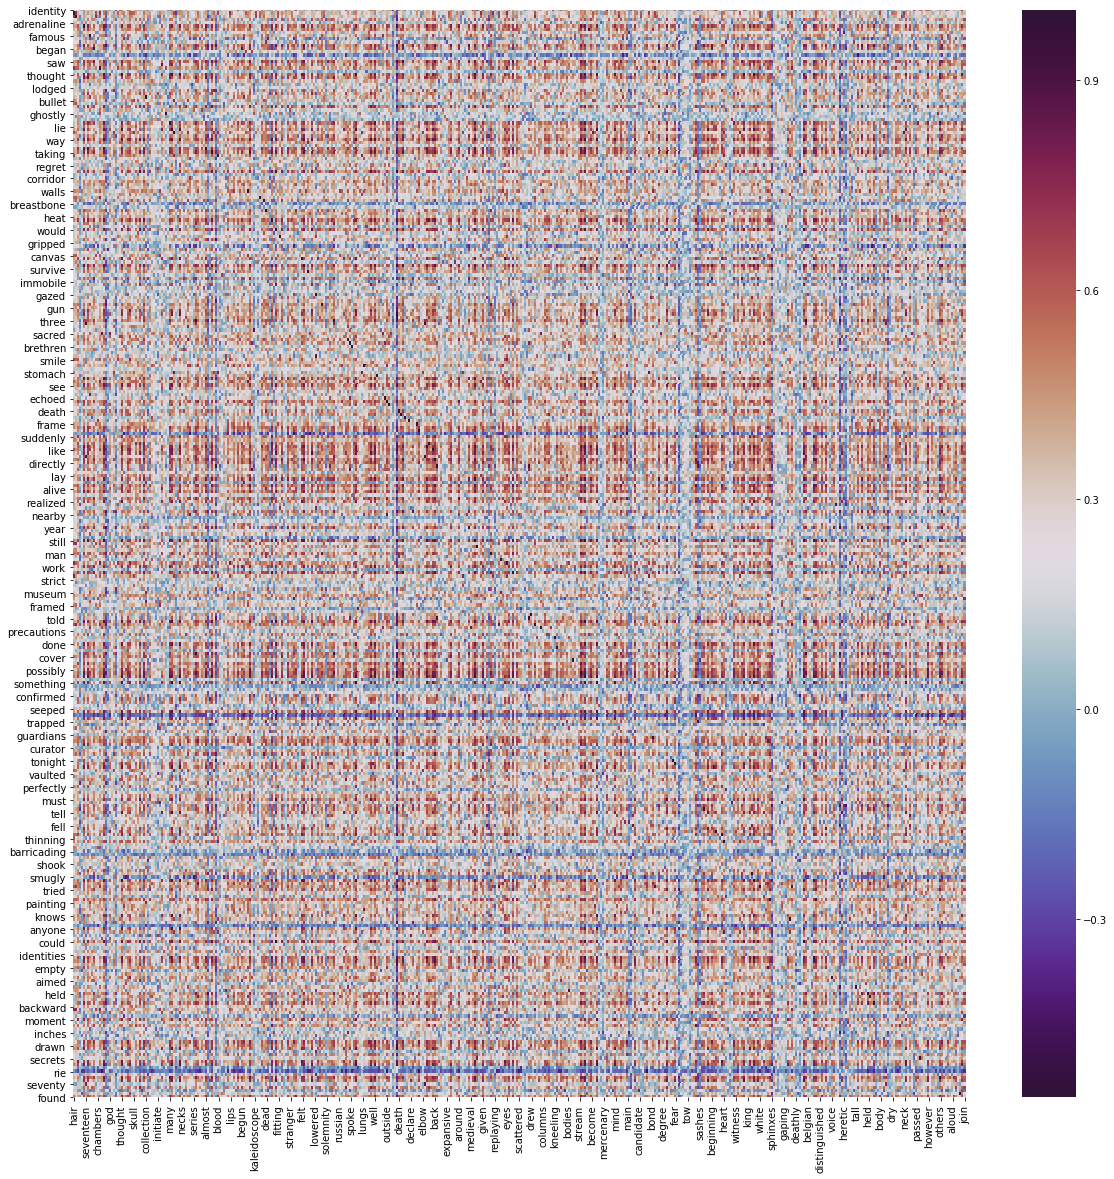

In [41]:
 fig, ax = plt.subplots(figsize=(20,20)) 
ax_blue = sns.heatmap(result_df, cmap="twilight_shifted")

In [42]:
 print(cosine_distance_wordembedding_method(da_vinci_code, lost_symbol))

Word Embedding method with a cosine distance assess that our two sentences are similar to 98.21 %
None


Above similarity percent help us conclude that the books written by same author have similaty of about **98%**

Secondly, we tried to check for if we get the same percent of similarity from the books of 2 Different authors 

We tried to find the similarity using the same cosine distance between

**Dan Brown's Da Vinci Code" and F. Scott Fitzgerald's The Great Gatsby**

In [43]:
great_gatsby_processed=preprocess(great_gatsby)

In [44]:
result_list_diff = [[cosine_distance_between_two_words(word1, word2) for word2 in great_gatsby_processed] for word1 in da_vinci_code_processed]

In [45]:
result_df = pd.DataFrame(result_list_diff)
result_df.columns = great_gatsby_processed
result_df.index = da_vinci_code_processed

In [46]:
result_df

materialism       era      made    soared  amendment  american  \
identity       0.255012  0.308335  0.418828  0.063072   0.322142  0.484165   
hair           0.100859  0.154076  0.490356  0.197279   0.037442  0.268712   
shirt          0.002262  0.239138  0.449582  0.151110   0.170353  0.304382   
struggling    -0.019472  0.334745  0.512339  0.424590   0.120779  0.513163   
adrenaline     0.150077 -0.108997  0.094232  0.165435  -0.227374 -0.053144   
...                 ...       ...       ...       ...        ...       ...   
instant        0.204679  0.242330  0.417391  0.244582   0.201941  0.290847   
found         -0.002661  0.297502  0.696453  0.278851   0.289613  0.554248   
true           0.321782  0.478780  0.602906  0.115168   0.343546  0.594542   
times          0.042094  0.574214  0.721139  0.505077   0.323771  0.645802   
irises         0.102633 -0.016236 -0.087913 -0.130686  -0.248911 -0.040341   

             roaring      kind  prohibition      went  ...  prosperity  \
identity   -0.148752  0.552274     0.259813  0.296594  ...    0.312315   
hair        0.261068  0.540809     0.095992  0.329206  ...    0.065854   
shirt       0.223263  0.378935     0.208844  0.386868  ...   -0.025296   
struggling  0.305758  0.513817     0.002702  0.602640  ...    0.439573   
adrenaline  0.528764  0.385232    -0.011703  0.206894  ...    0.092203   
...              ...       ...          ...       ...  ...         ...   
instant     0.164849  0.534651     0.260087  0.333680  ...    0.250763   
found       0.112272  0.595706     0.194973  0.571989  ...    0.109178   
true        0.176907  0.859415     0.231531  0.446374  ...    0.506871   
times       0.292624  0.615950     0.230770  0.752919  ...    0.257837   
irises      0.138431 -0.009830    -0.168395 -0.195009  ...   -0.042945   

             example     novel    levels  following  decadence  morality  \
identity    0.620433  0.397965  0.266036   0.450809   0.166653  0.504337   
hair        0.420248  0.261480  0.405048   0.221894   0.181199  0.205299   
shirt       0.256344  0.053988  0.125416   0.259367   0.105515  0.182951   
struggling  0.406968  0.107271  0.389117   0.493474   0.015005  0.197387   
adrenaline  0.076361  0.036079  0.363578   0.018148   0.136797  0.068736   
...              ...       ...       ...        ...        ...       ...   
instant     0.466586  0.342540  0.260823   0.336432   0.139139  0.255887   
found       0.739072  0.452436  0.512635   0.575689  -0.067597  0.219910   
true        0.782754  0.590411  0.390710   0.457349   0.254649  0.551962   
times       0.700809  0.487909  0.530839   0.710549   0.003598  0.252450   
irises     -0.000345 -0.040635  0.019850  -0.255574   0.110187 -0.099386   

            uncomfortable  chronicles  mandated  
identity         0.323726    0.406163  0.170730  
hair             0.385545    0.114798  0.079031  
shirt            0.266613    0.009167  0.104078  
struggling       0.353262   -0.025405  0.133667  
adrenaline       0.162144   -0.029082  0.027480  
...                   ...         ...       ...  
instant          0.231542    0.277825  0.047213  
found            0.351861    0.210447  0.145967  
true             0.531047    0.431531  0.083231  
times            0.425897    0.303735  0.180807  
irises           0.000636    0.098691 -0.104396  

[340 rows x 55 columns]

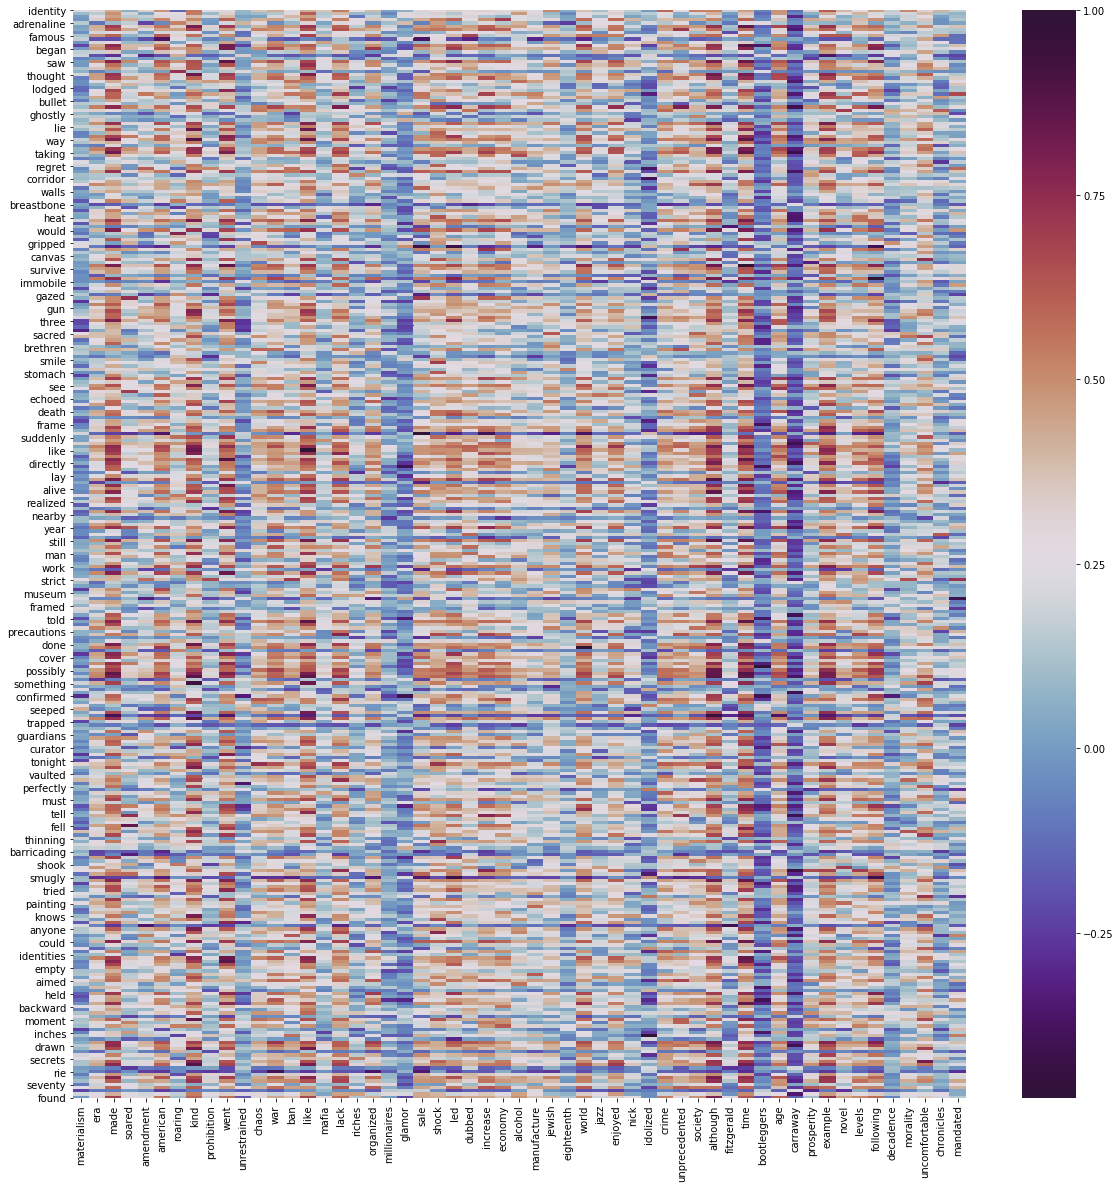

In [47]:
 fig, ax = plt.subplots(figsize=(20,20)) 
ax_blue = sns.heatmap(result_df, cmap="twilight_shifted")

In [50]:
 print(cosine_distance_wordembedding_method(da_vinci_code, great_gatsby))

Word Embedding method with a cosine distance assess that our two sentences are similar to 82.1 %
None


Looking at the similarity percenatge between the two books is around 82.1%

In [49]:
 print(cosine_distance_wordembedding_method(lost_symbol, great_gatsby))

Word Embedding method with a cosine distance assess that our two sentences are similar to 84.68 %
None


Looking at the similarity percenatge between the two books is around 84.68%